# Análisis Resultados
## Astex diverse set

In [1]:
# cargar fichero resultados
import pandas as pd
import numpy as np

def load_result(path_file:str):
    df= pd.read_csv(path_file, header=None, usecols=[0] + list(np.arange(3, 30)),  index_col=0)
    df.columns=[
    "mol_pred_loaded",
    "mol_true_loaded",
    "mol_cond_loaded",
    "sanitization",
    "inchi_convertible",
    "all_atoms_connected",
    "molecular_formula",
    "molecular_bonds",
    "double_bond_stereochemistry",
    "tetrahedral_chirality",
    "bond_lengths",
    "bond_angles",
    "internal_steric_clash",
    "aromatic_ring_flatness",
    "non_aromatic_ring_non_flatness",
    "double_bond_flatness",
    "internal_energy",
    "protein_ligand_maximum_distance",
    "minimum_distance_to_protein",
    "minimum_distance_to_organic_cofactors",
    "minimum_distance_to_inorganic_cofactors",
    "minimum_distance_to_waters",
    "volume_overlap_with_protein",
    "volume_overlap_with_organic_cofactors",
    "volume_overlap_with_inorganic_cofactors",
    "volume_overlap_with_waters",
    "rmsd_leq_2A"
]
    return df


In [2]:
# número de test que pasa cada complejo proteina-ligando
def test_per_complex(df):
    return df.sum(axis=1)


In [3]:
# complejos que pasan todos los test
def all_test(df):
    return df.all(axis=1)

In [4]:
# Visualizaciones

import matplotlib.pyplot as plt

def plot_test_test_per_complex(data, title):

    normalized_data =test_per_complex(data)/27
    colors = ['red' if val >= 1 else 'blue' for val in normalized_data]

    ax = normalized_data.plot(kind="bar", figsize=(20, 5), color=colors)
    plt.xlabel("Test")
    plt.ylabel("Número de complejos que pasan el test")
    plt.title(title)
    plt.show()


import seaborn as sns

def plot_heat_map(data):
    plt.figure(figsize=(20, 18))
    sns.heatmap(data.astype(int), cmap="coolwarm", cbar=True)
    plt.xlabel("Tests")
    plt.ylabel("Complejos proteína-ligando")
    plt.show()


## Resultados DiffDock

In [5]:
diffdock_astex=load_result("results/results_astex_diffdock/evaluation_diffdock.csv")

In [6]:
test_per_complex(diffdock_astex)

0
1G9V_RQ3    18
1GKC_NFH    25
1GM8_SOX    25
1GPK_HUP    26
1HNN_SKF    26
            ..
1YWR_LI9    27
1Z95_198    27
2BM2_PM2    26
2BR1_PFP    27
2BSM_BSM    27
Length: 85, dtype: int64

In [7]:
all_test(diffdock_astex)

0
1G9V_RQ3    False
1GKC_NFH    False
1GM8_SOX    False
1GPK_HUP    False
1HNN_SKF    False
            ...  
1YWR_LI9     True
1Z95_198     True
2BM2_PM2    False
2BR1_PFP     True
2BSM_BSM     True
Length: 85, dtype: bool

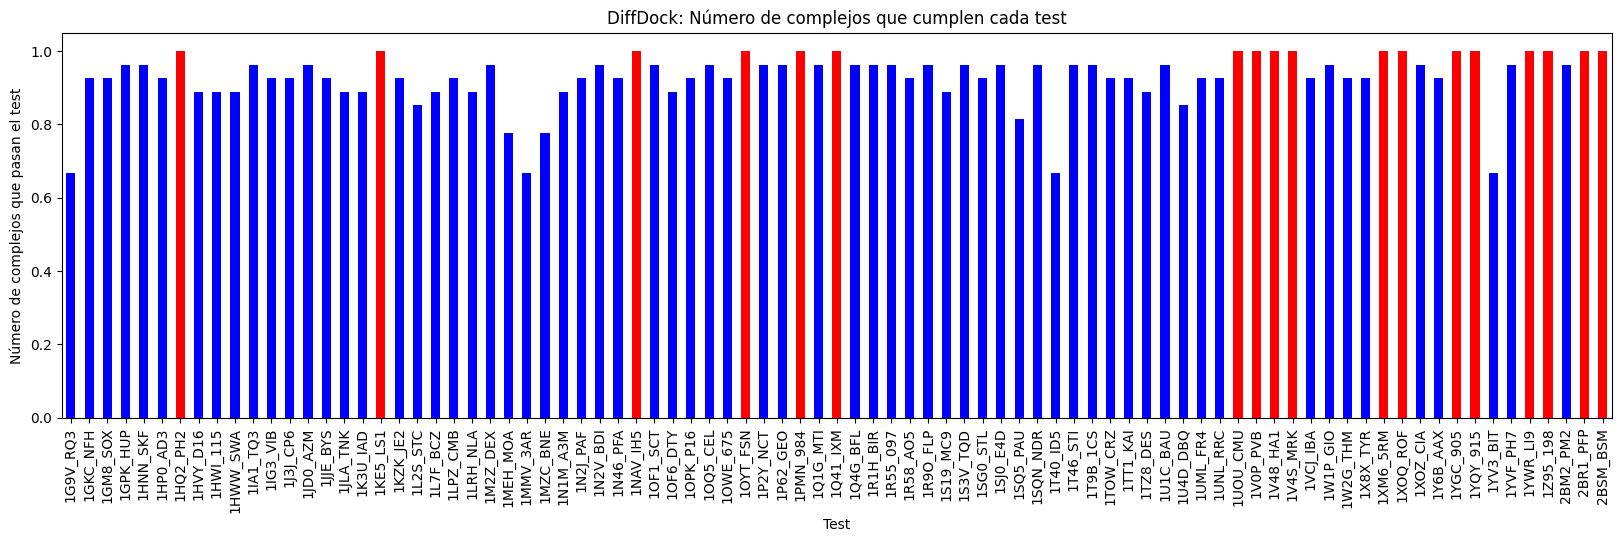

In [8]:
plot_test_test_per_complex(diffdock_astex, "DiffDock: Número de complejos que cumplen cada test")

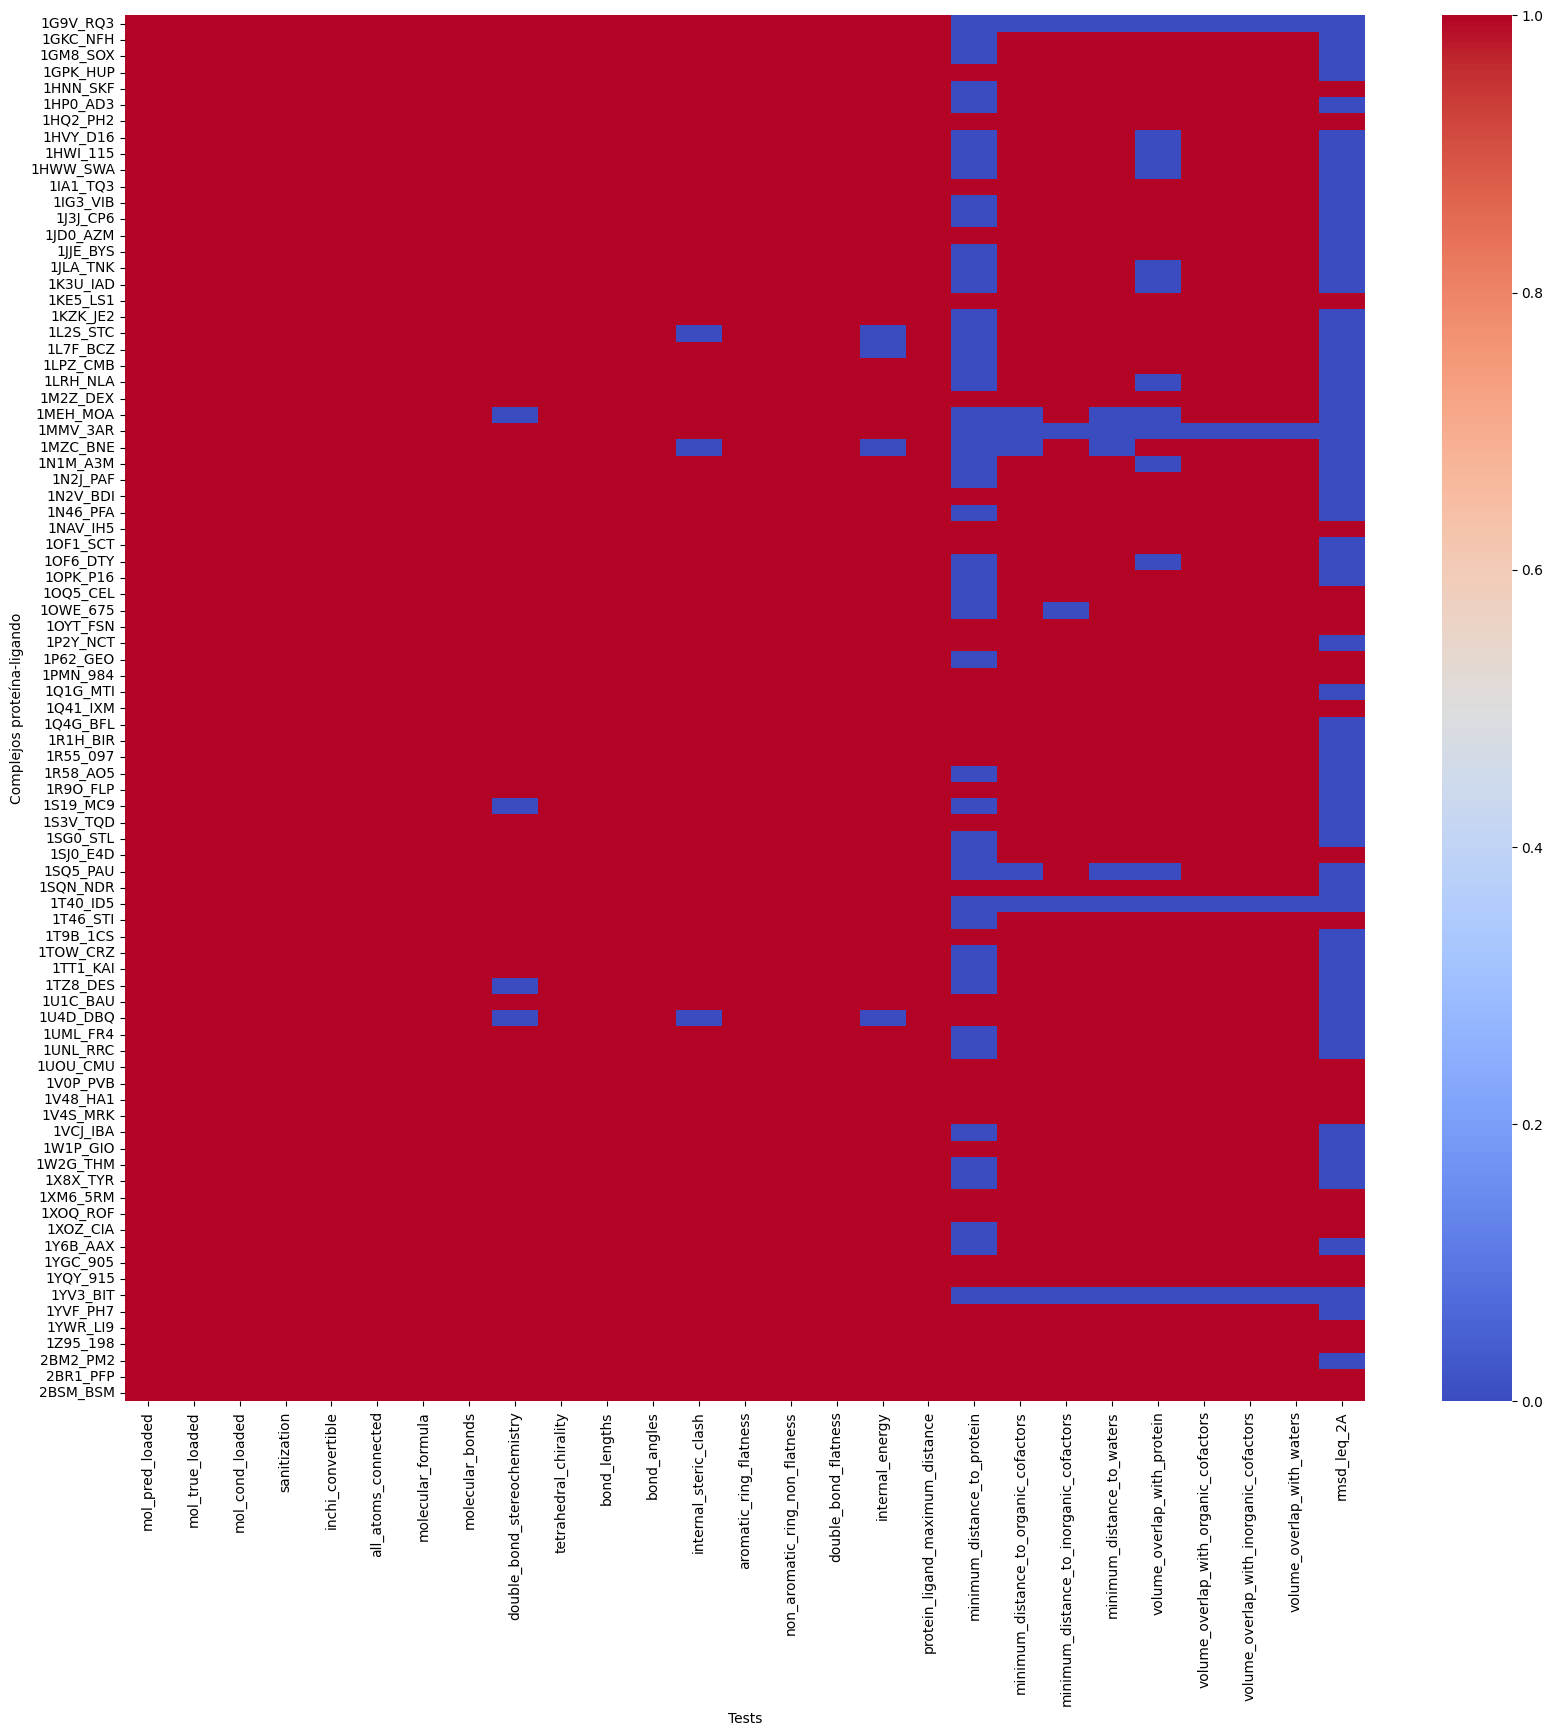

In [9]:
plot_heat_map(diffdock_astex)

## Resultados EquiBind

In [10]:
equibind_astex = load_result("/home/carmen/docking/results/results_astex_equibind/resultsBust.csv")
equibind_astex

,mol_pred_loaded,mol_true_loaded,mol_cond_loaded,sanitization,inchi_convertible,all_atoms_connected,molecular_formula,molecular_bonds,double_bond_stereochemistry,tetrahedral_chirality,...,protein_ligand_maximum_distance,minimum_distance_to_protein,minimum_distance_to_organic_cofactors,minimum_distance_to_inorganic_cofactors,minimum_distance_to_waters,volume_overlap_with_protein,volume_overlap_with_organic_cofactors,volume_overlap_with_inorganic_cofactors,volume_overlap_with_waters,rmsd_leq_2A
0,,,,,,,,,,,,,,,,,,,,,
1G9V_RQ3,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
1GKC_NFH,True,True,True,True,True,True,True,True,True,True,...,True,False,True,False,True,False,True,True,True,False
1GM8_SOX,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
1GPK_HUP,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
1HNN_SKF,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1YWR_LI9,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
1Z95_198,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
2BM2_PM2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False


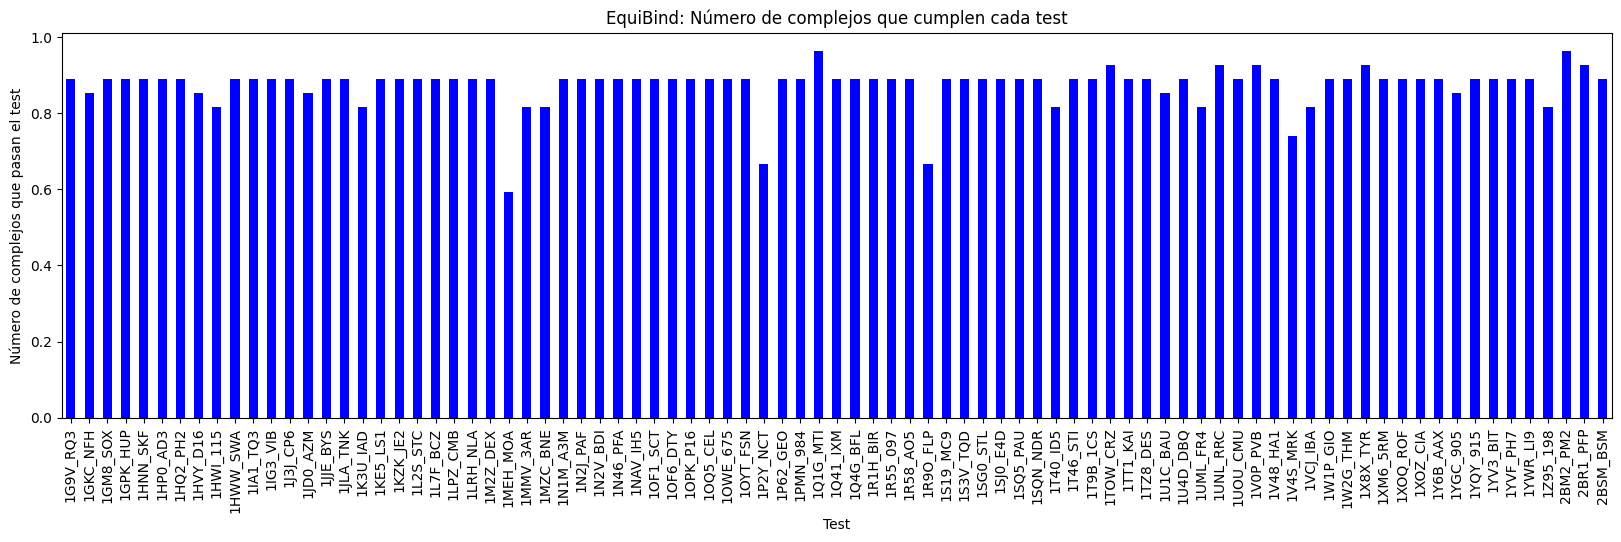

In [11]:
plot_test_test_per_complex(equibind_astex, "EquiBind: Número de complejos que cumplen cada test")

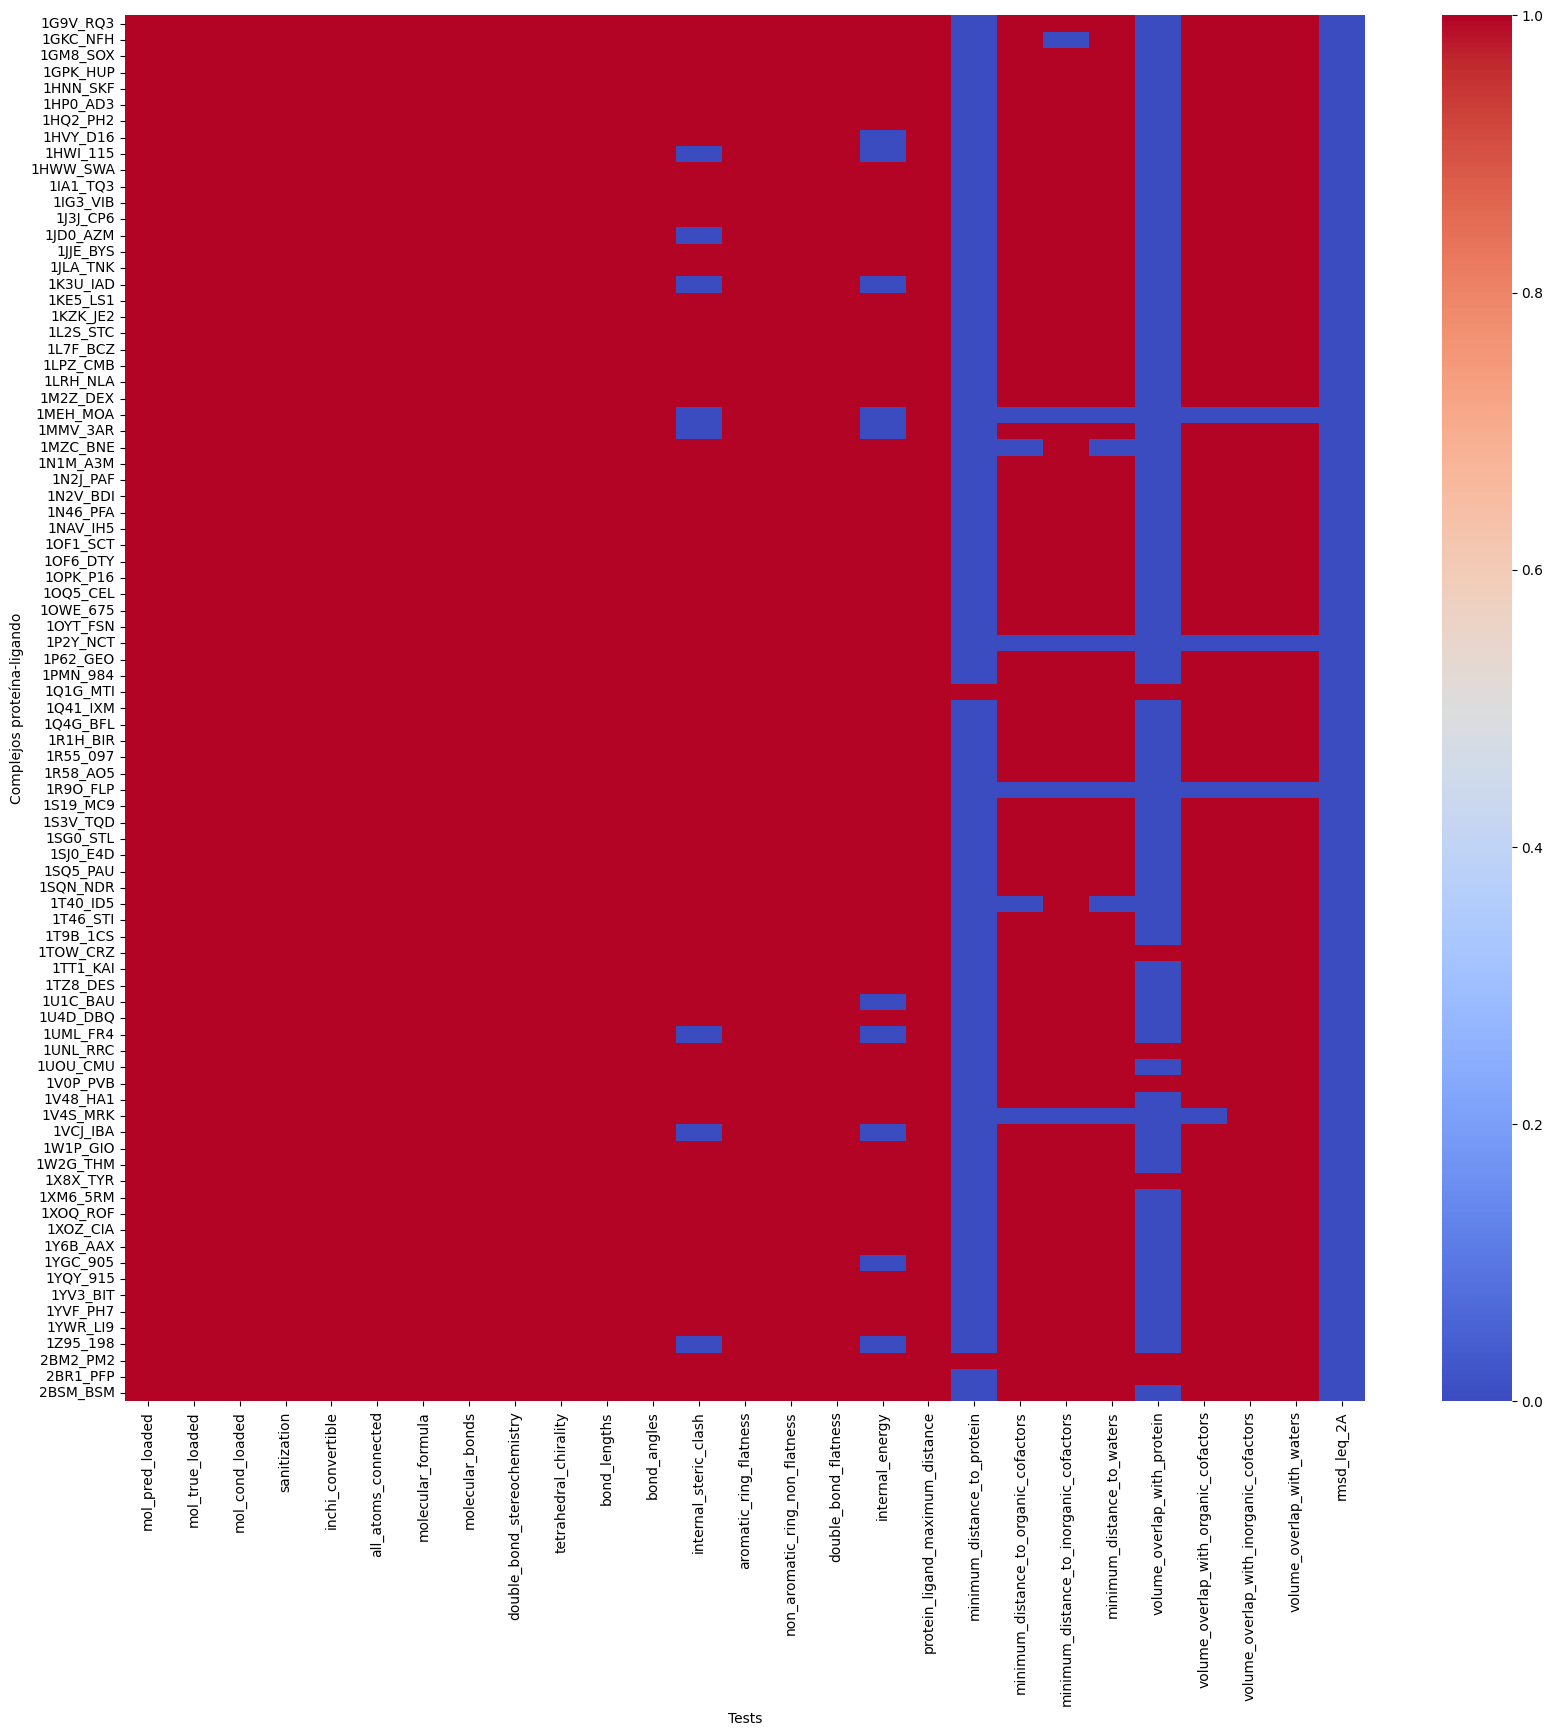

In [12]:
plot_heat_map(equibind_astex)

## Resultados DeepDock

Para algunos sdf no se ha podido realizar el test de posebuster porque salia un error de unkekulized atoms. No se si debería tomarse directamente como que el test ha fallado.

In [13]:
deepdock_astex = load_result("/home/carmen/docking/results/resultsBustDeepDock.csv")
deepdock_astex

,mol_pred_loaded,mol_true_loaded,mol_cond_loaded,sanitization,inchi_convertible,all_atoms_connected,molecular_formula,molecular_bonds,double_bond_stereochemistry,tetrahedral_chirality,...,protein_ligand_maximum_distance,minimum_distance_to_protein,minimum_distance_to_organic_cofactors,minimum_distance_to_inorganic_cofactors,minimum_distance_to_waters,volume_overlap_with_protein,volume_overlap_with_organic_cofactors,volume_overlap_with_inorganic_cofactors,volume_overlap_with_waters,rmsd_leq_2A
0,,,,,,,,,,,,,,,,,,,,,
1G9V_RQ3,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
1GKC_NFH,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
1GM8_SOX,True,True,True,True,True,True,True,True,True,False,...,True,False,True,True,True,False,True,True,True,False
1HNN_SKF,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1HWW_SWA,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,True
1IA1_TQ3,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,False
1J3J_CP6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1JD0_AZM,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,True
1JJE_BYS,True,True,True,True,True,True,True,True,True,False,...,True,False,True,True,True,False,True,True,True,False


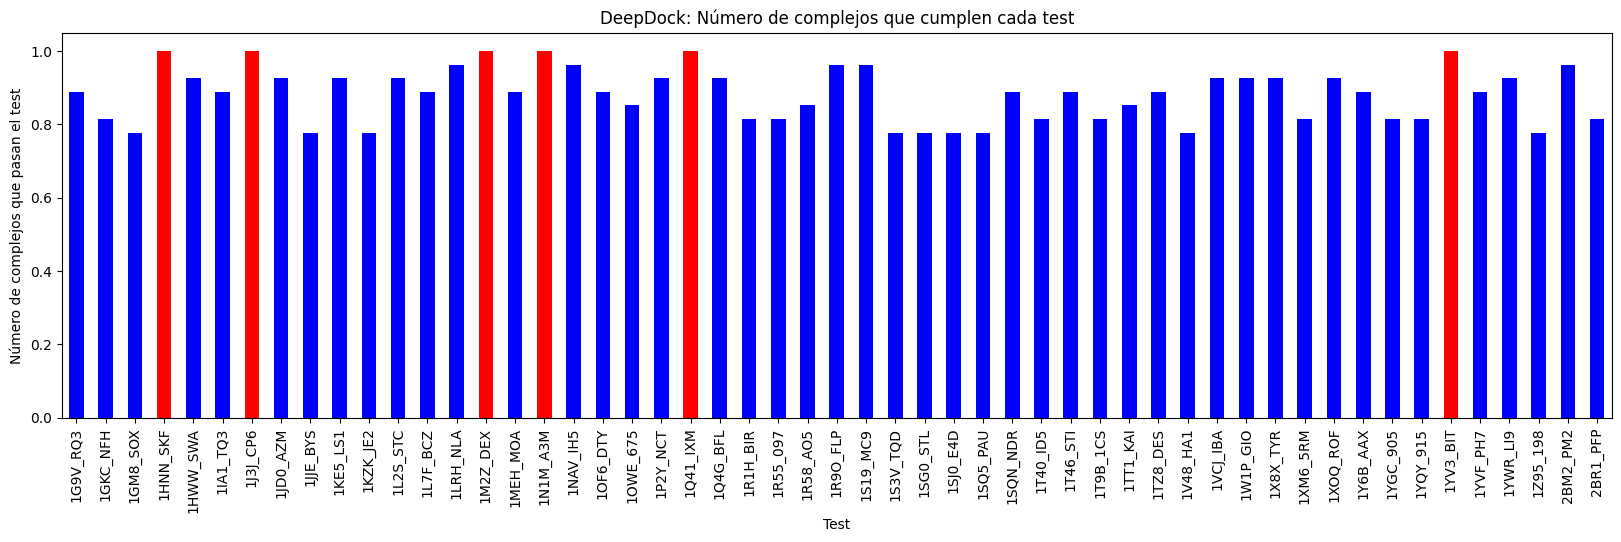

In [14]:
plot_test_test_per_complex(deepdock_astex, "DeepDock: Número de complejos que cumplen cada test")

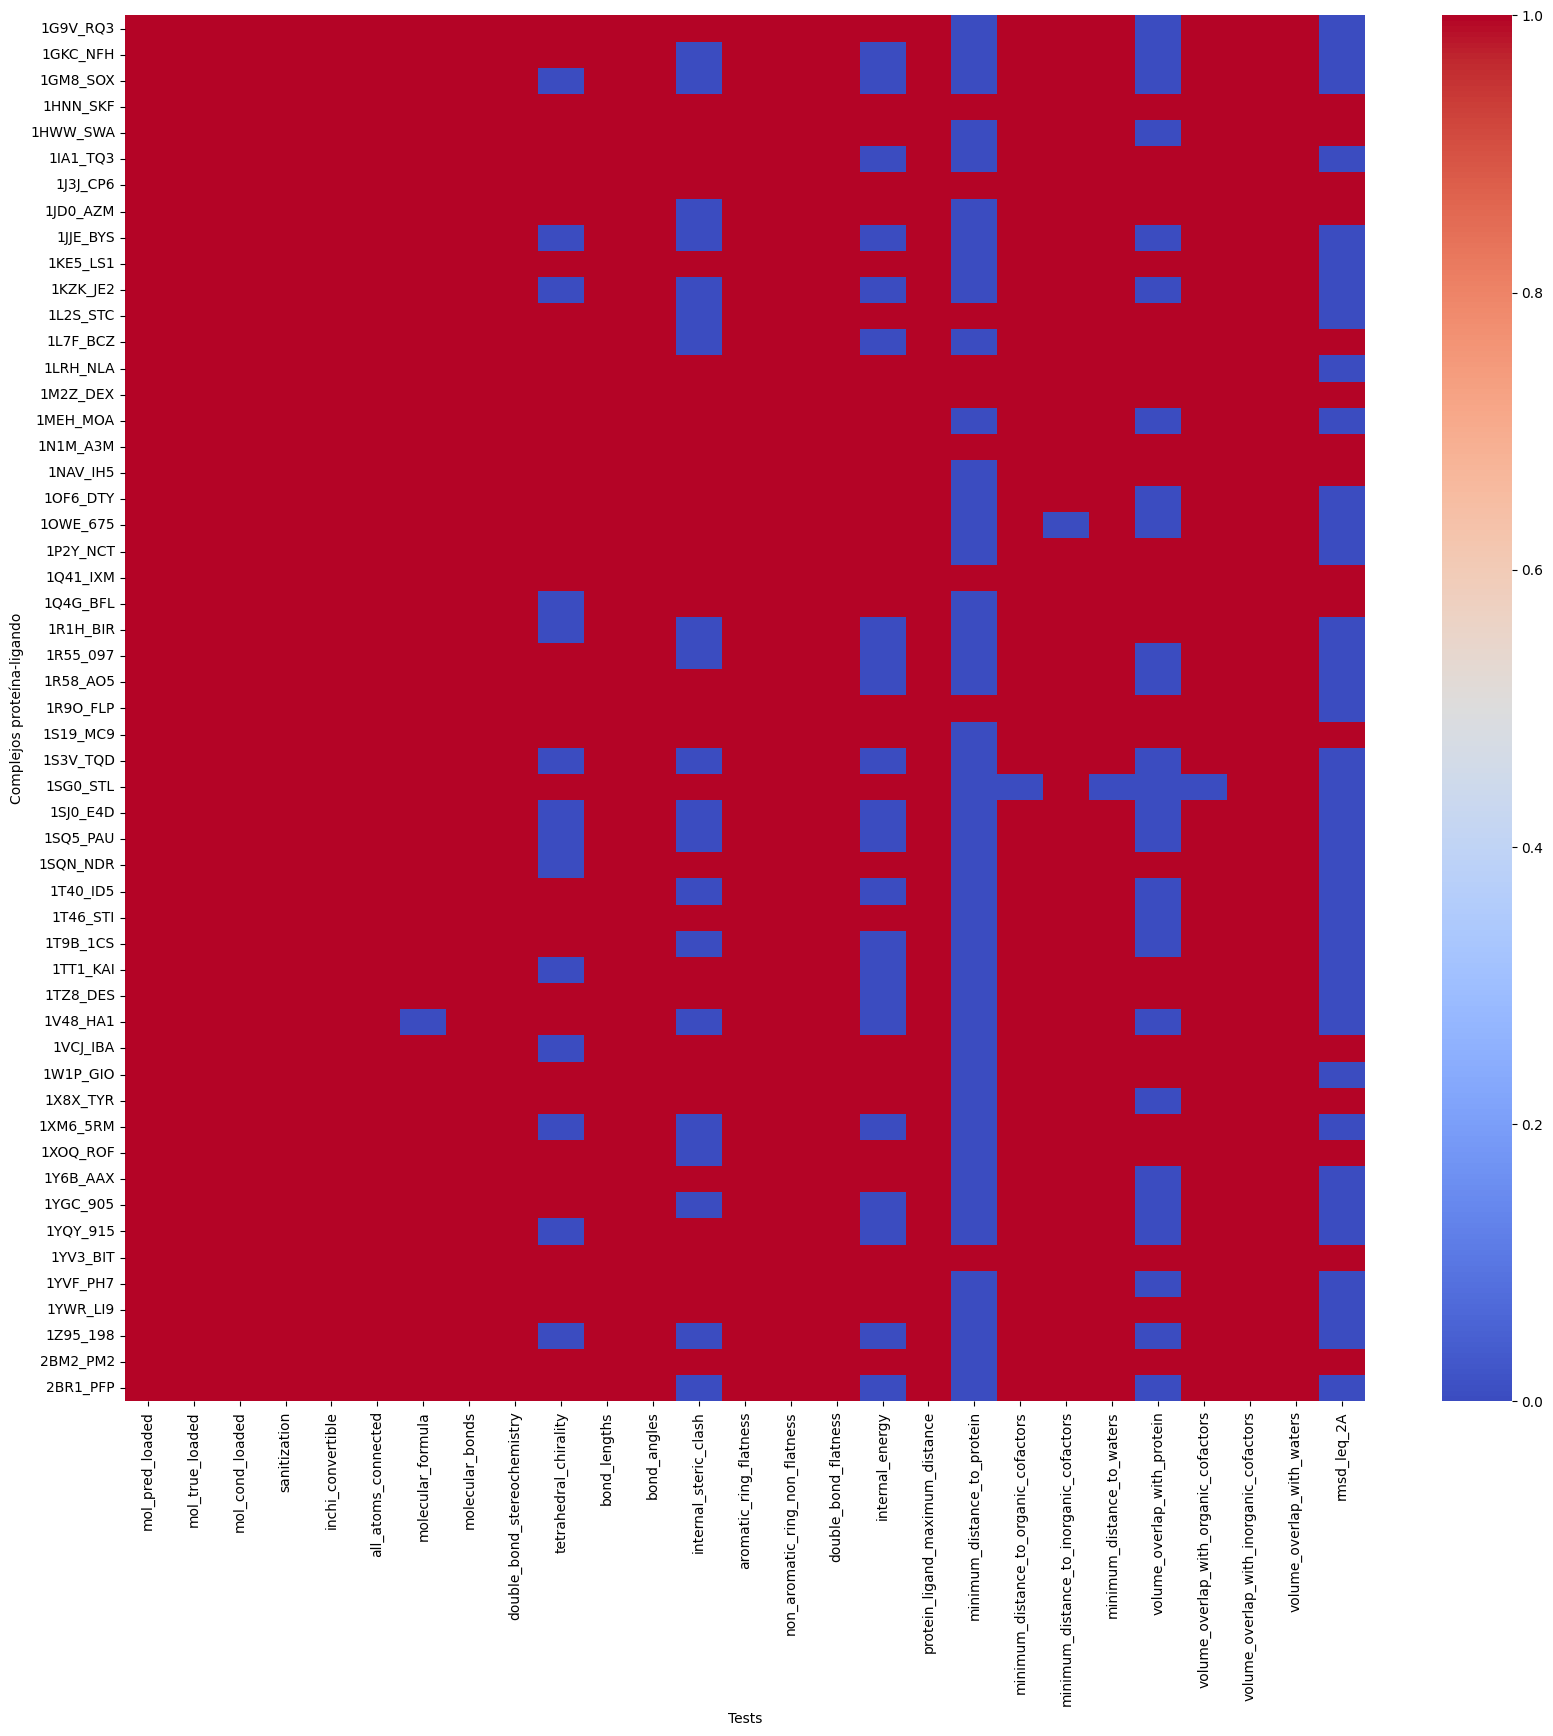

In [15]:
plot_heat_map(deepdock_astex)

## Resultados UniMol

In [16]:
unimol_astex = load_result("results/results_astex_unimol/resultsBustUniMol.csv")
unimol_astex

,mol_pred_loaded,mol_true_loaded,mol_cond_loaded,sanitization,inchi_convertible,all_atoms_connected,molecular_formula,molecular_bonds,double_bond_stereochemistry,tetrahedral_chirality,...,protein_ligand_maximum_distance,minimum_distance_to_protein,minimum_distance_to_organic_cofactors,minimum_distance_to_inorganic_cofactors,minimum_distance_to_waters,volume_overlap_with_protein,volume_overlap_with_organic_cofactors,volume_overlap_with_inorganic_cofactors,volume_overlap_with_waters,rmsd_leq_2A
0,,,,,,,,,,,,,,,,,,,,,
1G9V_RQ3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1GKC_NFH,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1GM8_SOX,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1HNN_SKF,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1HP0_AD3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1YVF_PH7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1YWR_LI9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1Z95_198,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False


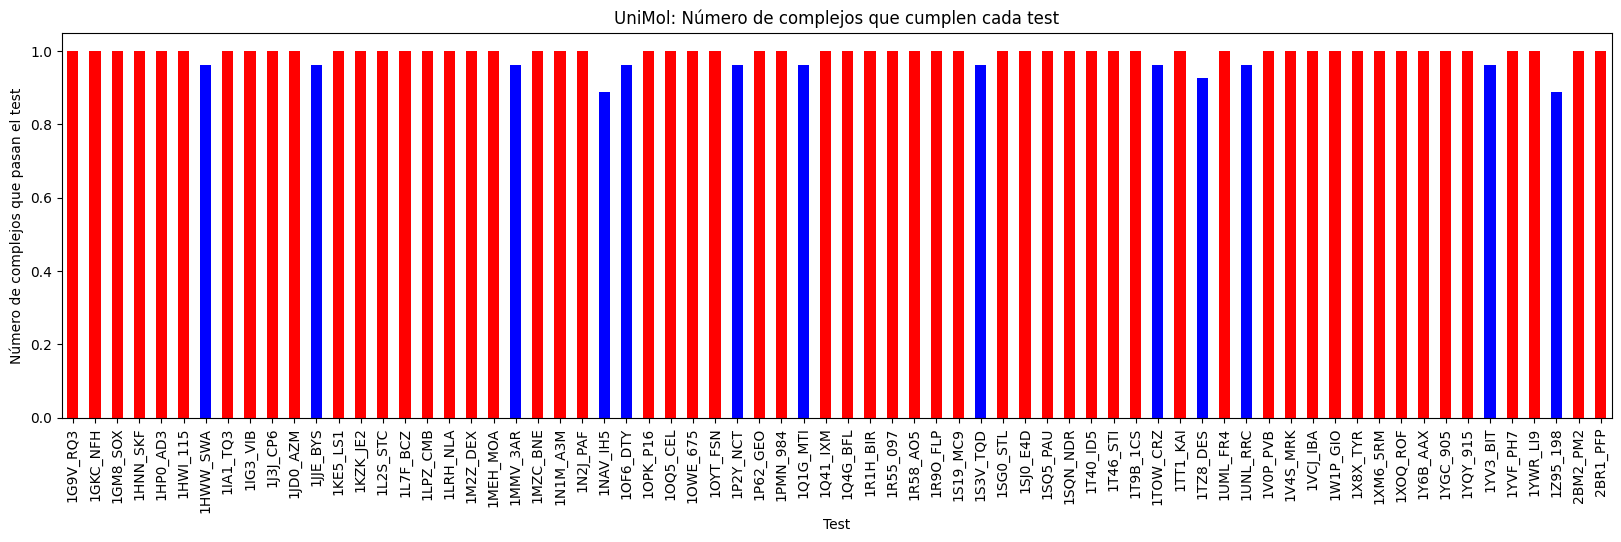

In [17]:
plot_test_test_per_complex(unimol_astex, "UniMol: Número de complejos que cumplen cada test")

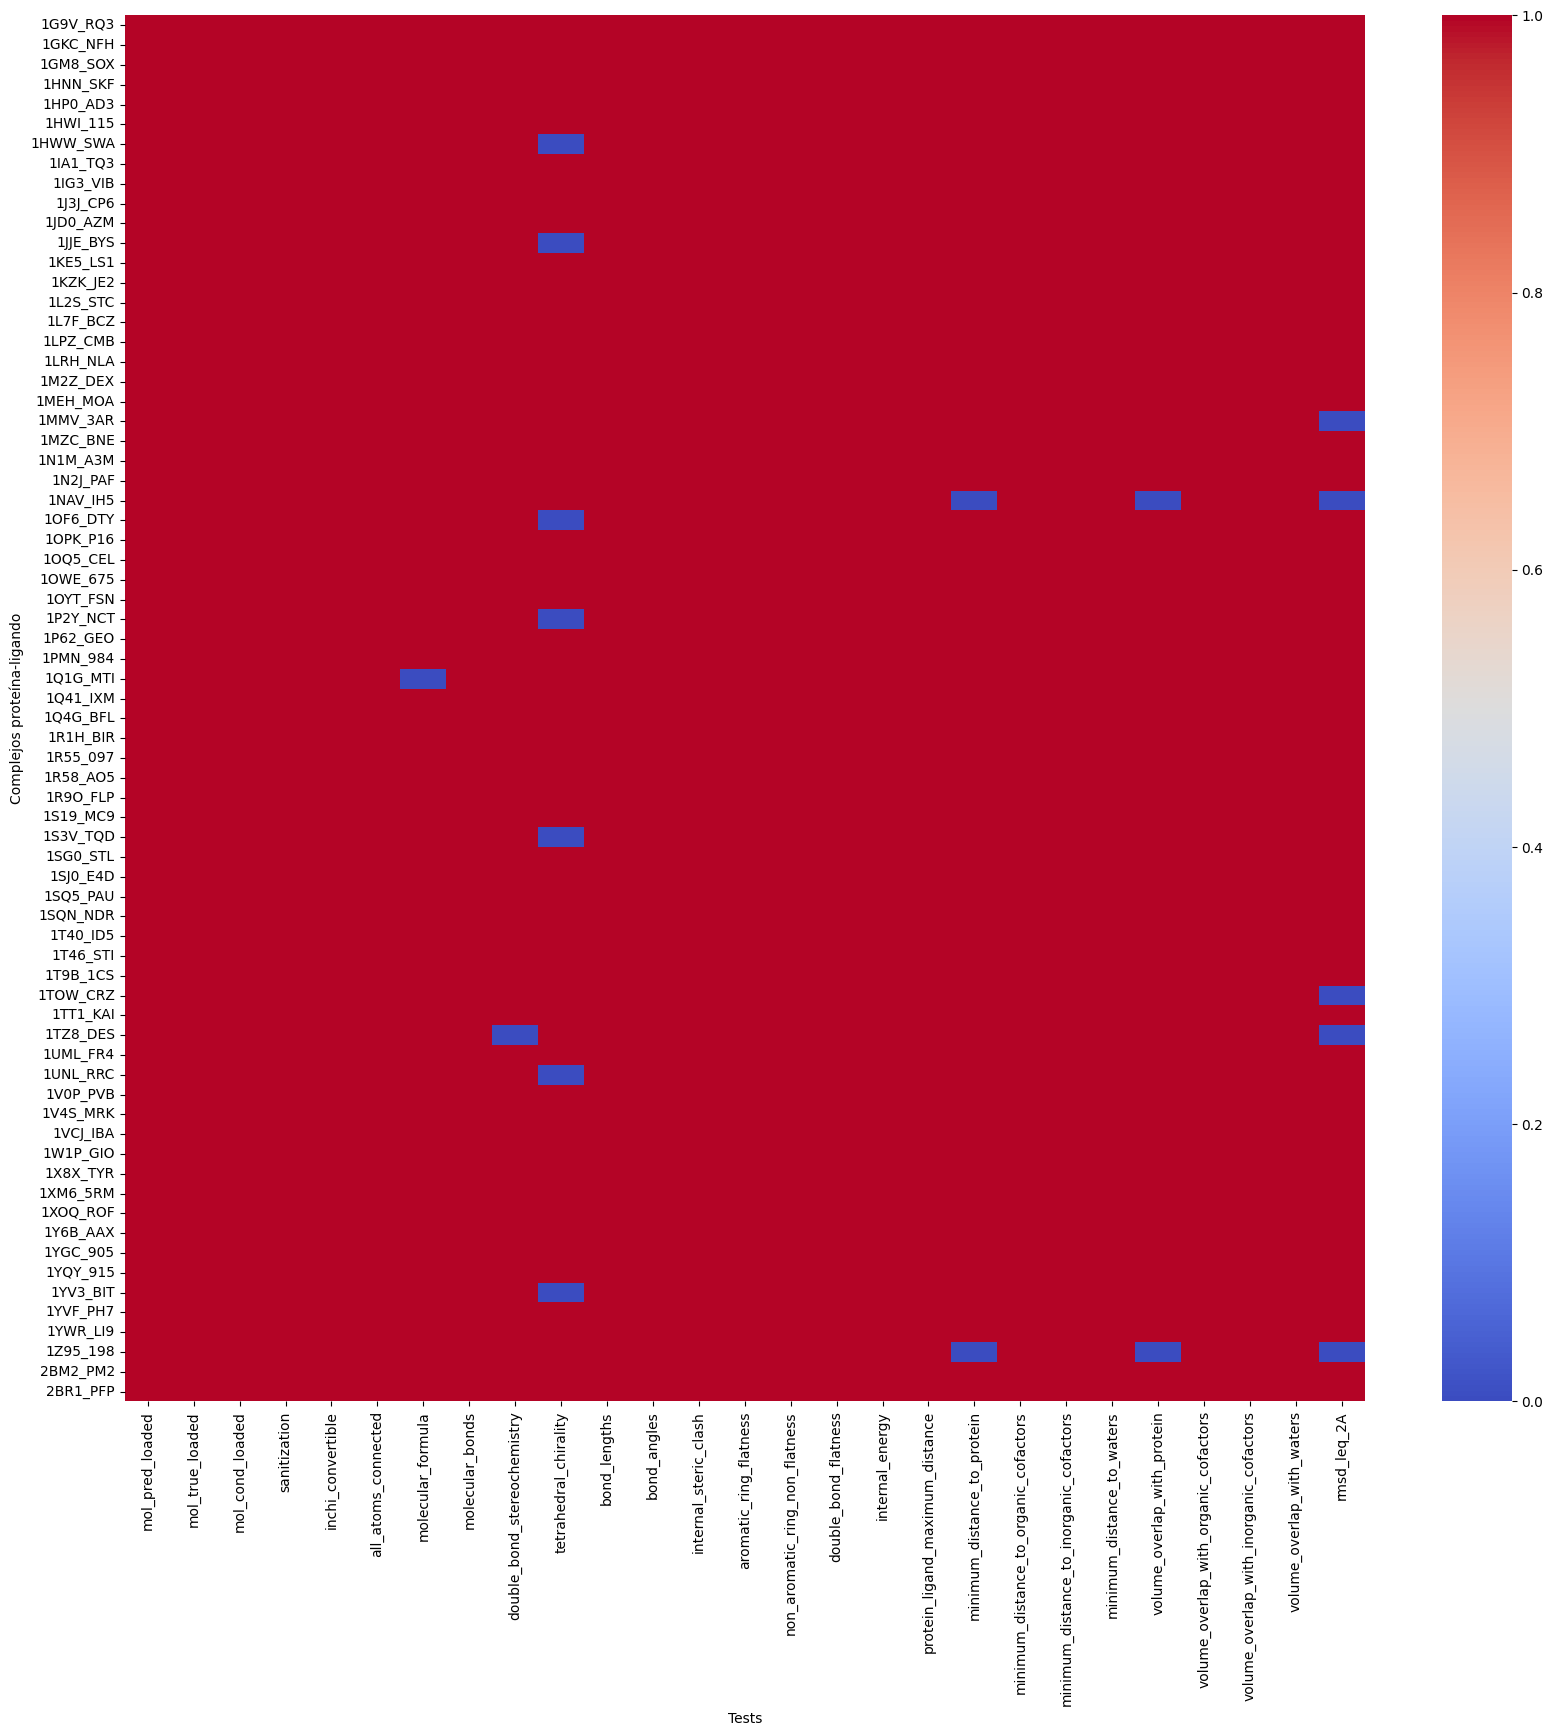

In [18]:
plot_heat_map(unimol_astex)

# Comparar los distintos resultados

/home/carmen/miniconda3/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/carmen/miniconda3/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

<Figure size 1200x600 with 0 Axes>

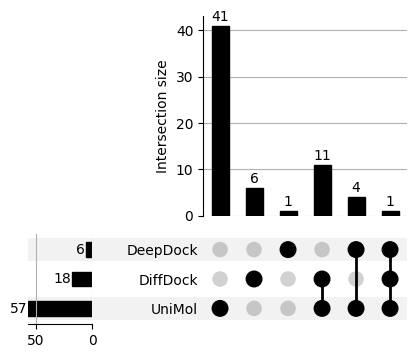

In [19]:
#Diagramas de Venn
import pandas as pd
from upsetplot import UpSet
import matplotlib.pyplot as plt

def true_rows(df):
    """Devuelve los índices de las filas donde todos los valores son True."""
    return set(df.index[df.all(axis=1)])

# Supongamos que tienes estos DataFrames
# df1, df2, df3, df4

# Crear diccionario de sets
sets = {
    "DiffDock": true_rows(diffdock_astex),
    "DeepDock": true_rows(deepdock_astex),
    "EquiBind": true_rows(equibind_astex),
    "Unimol": true_rows(unimol_astex)
}

# Crear una tabla binaria (True si el índice está en el set)
all_indices = set.union(*sets.values())
binary_data = {
    idx: [idx in sets["DiffDock"], idx in sets["DeepDock"], idx in sets["EquiBind"], idx in sets["Unimol"]]
    for idx in all_indices
}

# Convertir a DataFrame
binary_df = pd.DataFrame.from_dict(binary_data, orient="index", columns=["DiffDock", "DeepDock", "EquiBind", "UniMol"])

# Contar ocurrencias
from upsetplot import from_indicators
upset_data = from_indicators(binary_df.columns, binary_df)

# Graficar
plt.figure(figsize=(12, 6))
UpSet(upset_data, show_counts=True).plot()
#plt.title("UpSet plot - Complejos que pasan todos los tests")
plt.show()


<Figure size 1000x1000 with 0 Axes>

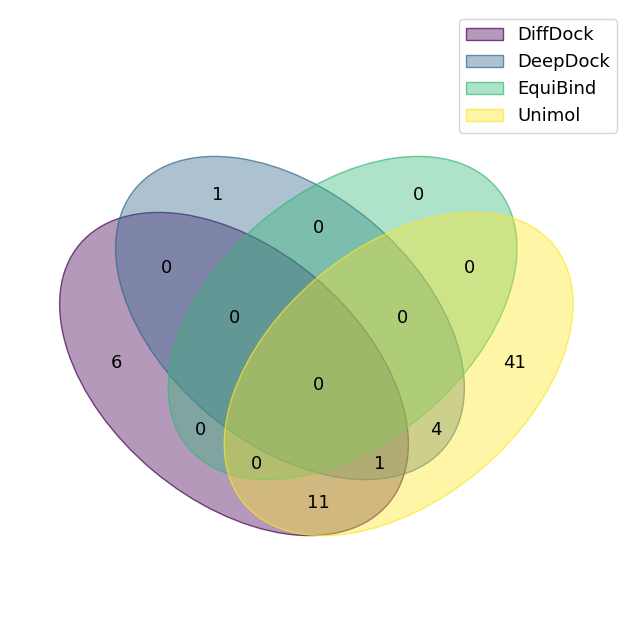

In [20]:
import matplotlib.pyplot as plt
from venn import venn

def true_rows(df):
    """Devuelve los índices de las filas donde todos los valores son True."""
    return set(df.index[df.all(axis=1)])

# Tus DataFrames
# df1, df2, df3, df4

# Crear los sets
sets = {
    "DiffDock": true_rows(diffdock_astex),
    "DeepDock": true_rows(deepdock_astex),
    "EquiBind": true_rows(equibind_astex),
    "Unimol": true_rows(unimol_astex)
}
# Graficar Venn
plt.figure(figsize=(10, 10))
venn(sets)
#plt.title("Venn 4 conjuntos - Complejos que pasan todos los tests")
plt.show()


Chequear por que no cuadra mucho

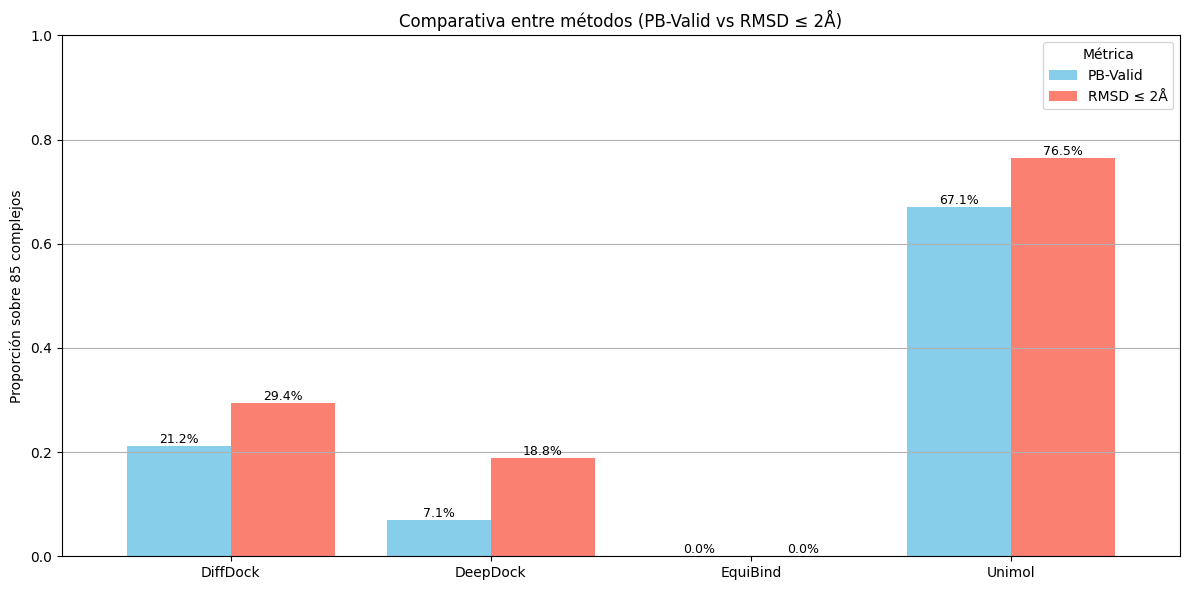

In [21]:
# Diagrama de Barra con el porcentaje de aciertos 

## !! Supongo que lo que ha fallado en deepdock y unimol es que no son pb valid

#diffdock_astex.all(axis=1).sum()/85 # porcentaje que pasa todos los test
#diffdock_results['rmsd_leq_2A'].sum()/82

import matplotlib.pyplot as plt
import pandas as pd


sets = {
    "DiffDock": diffdock_astex,
    "DeepDock": deepdock_astex,
    "EquiBind": equibind_astex,
    "Unimol": unimol_astex
}


proporciones_pass_all = {}
proporciones_rmsd = {}

for nombre, df in sets.items():
    proporciones_pass_all[nombre] = df.all(axis=1).sum() / 85
    proporciones_rmsd[nombre] = df['rmsd_leq_2A'].sum() / 85

proporciones_df = pd.DataFrame({
    "PB-Valid": proporciones_pass_all,
    "RMSD ≤ 2Å": proporciones_rmsd
})

ax = proporciones_df.plot(kind="bar", figsize=(12,6), color=["skyblue", "salmon"], width=0.8)

plt.ylabel("Proporción sobre 85 complejos")
plt.title("Comparativa entre métodos (PB-Valid vs RMSD ≤ 2Å)")
plt.ylim(0, 1)
plt.grid(axis='y')

# Añadir etiquetas de porcentaje
for container in ax.containers:
    ax.bar_label(container, labels=[f"{v*100:.1f}%" for v in container.datavalues], label_type='edge', fontsize=9)

# Ajustes visuales para mejorar la estética
plt.xticks(rotation=0)  # Dejar los nombres de los métodos horizontales
plt.legend(title="Métrica")
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## PoseBusters_Benchmark_set

Para equibind todos fallan en el ultimo test.
!El articulo solo usa 307 complejos pero no se cuales. Remove ligands which are within 5.0 ˚A of any protein symmetry
mate 

In [22]:
with open('pb.txt', 'r') as archivo:
    # Leer el contenido del archivo
    contenido = archivo.read()

# Separar el contenido por comas y almacenarlo en una lista
lista = contenido.split(',')

# Imprimir la lista resultante
len(lista)

308

In [23]:
ep= load_result("results/results_posebusters_benchmark_set/resultsBust.csv")

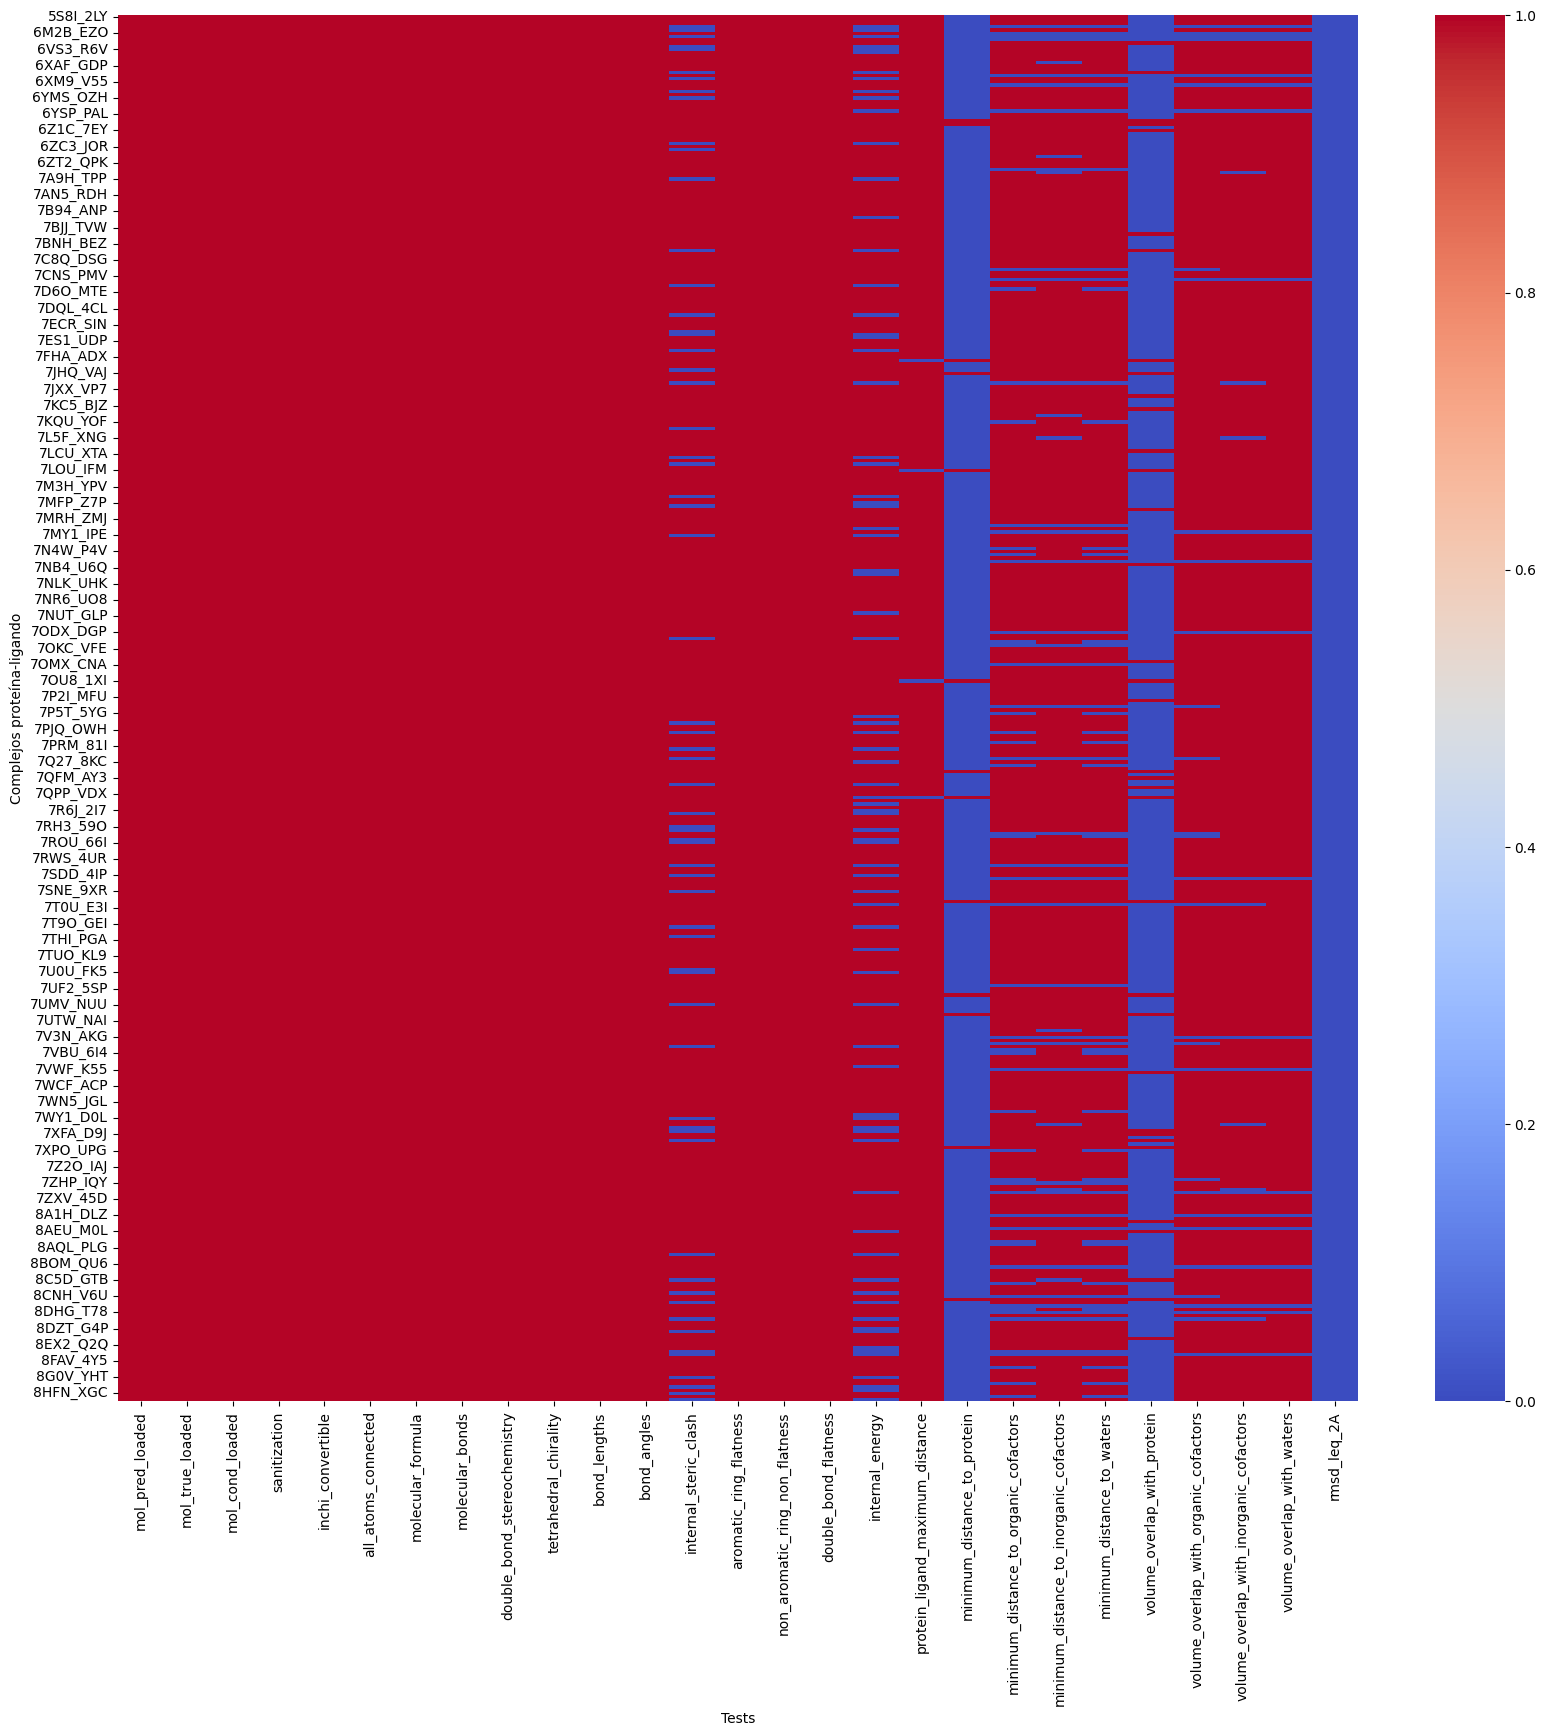

In [24]:
plot_heat_map(ep)

In [31]:
dip= load_result("results/results_posebusters_diffdock/evaluation.csv")
dip

,mol_pred_loaded,mol_true_loaded,mol_cond_loaded,sanitization,inchi_convertible,all_atoms_connected,molecular_formula,molecular_bonds,double_bond_stereochemistry,tetrahedral_chirality,...,protein_ligand_maximum_distance,minimum_distance_to_protein,minimum_distance_to_organic_cofactors,minimum_distance_to_inorganic_cofactors,minimum_distance_to_waters,volume_overlap_with_protein,volume_overlap_with_organic_cofactors,volume_overlap_with_inorganic_cofactors,volume_overlap_with_waters,rmsd_leq_2A
0,,,,,,,,,,,,,,,,,,,,,
5S8I_2LY,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,False
5SAK_ZRY,True,True,True,True,True,True,True,True,True,True,...,True,False,False,True,False,True,True,True,True,False
5SB2_1K2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5SD5_HWI,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,False,False,False,False,False,False
5SIS_JSM,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8GFD_ZHR,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,False
8H0M_2EH,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False
8HFN_XGC,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,False,True,True,True,False


In [37]:
#filtrar

with open("pb.txt", "r") as f:
    protein = [x.strip() for x in f.read().split(",")]


protein=[x.replace(' ', '_') for x in protein]
protein

['5SAK_ZRY',
 '5SB2_1K2',
 '5SD5_HWI',
 '5SIS_JSM',
 '6M2B_EZO',
 '6M73_FNR',
 '6T88_MWQ',
 '6TW5_9M2',
 '6TW7_NZB',
 '6VTA_AKN',
 '6WTN_RXT',
 '6XBO_5MC',
 '6XCT_478',
 '6XG5_TOP',
 '6XHT_V2V',
 '6XM9_V55',
 '6YJA_2BA',
 '6YMS_OZH',
 '6YQV_8K2',
 '6YQW_82I',
 '6YR2_T1C',
 '6YRV_PJ8',
 '6YSP_PAL',
 '6YT6_PKE',
 '6YYO_Q1K',
 '6Z0R_Q4H',
 '6Z14_Q4Z',
 '6Z1C_7EY',
 '6Z2C_Q5E',
 '6Z4N_Q7B',
 '6ZAE_ACV',
 '6ZC3_JOR',
 '6ZCY_QF8',
 '6ZK5_IMH',
 '6ZPB_3D1',
 '7A1P_QW2',
 '7A9E_R4W',
 '7A9H_TPP',
 '7AFX_R9K',
 '7AKL_RK5',
 '7AN5_RDH',
 '7B2C_TP7',
 '7B94_ANP',
 '7BCP_GCO',
 '7BJJ_TVW',
 '7BKA_4JC',
 '7BMI_U4B',
 '7BNH_BEZ',
 '7BTT_F8R',
 '7C0U_FGO',
 '7C3U_AZG',
 '7C8Q_DSG',
 '7CD9_FVR',
 '7CIJ_G0C',
 '7CL8_TES',
 '7CNQ_G8X',
 '7CNS_PMV',
 '7CTM_BDP',
 '7CUO_PHB',
 '7D5C_GV6',
 '7D6O_MTE',
 '7DKT_GLF',
 '7DQL_4CL',
 '7DUA_HJ0',
 '7E4L_MDN',
 '7EBG_J0L',
 '7ECR_SIN',
 '7ED2_A3P',
 '7ELT_TYM',
 '7EPV_FDA',
 '7ES1_UDP',
 '7F51_BA7',
 '7F5D_EUO',
 '7F8T_FAD',
 '7FB7_8NF',
 '7FHA_ADX',
 '7FRX_O88',

In [45]:
# Filtrar equibind

ep_filtered=ep.loc[protein]

In [46]:
dip_filtered=dip.loc[dip.index.intersection(protein)] #faltan algunos y si no se produce un error

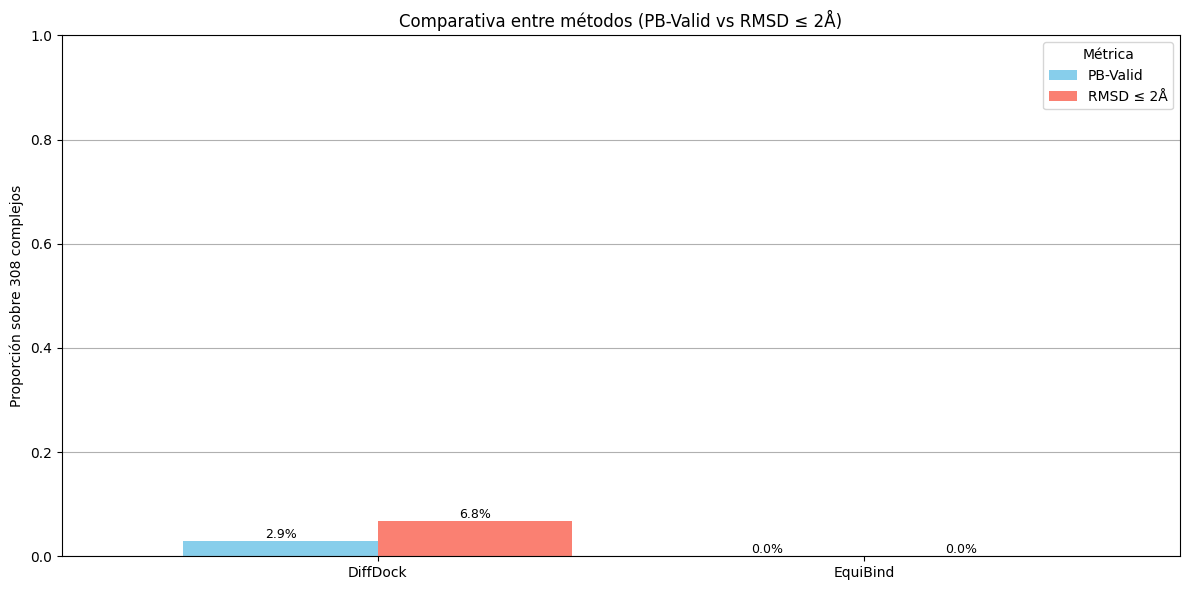

In [47]:
sets = {
    "DiffDock": dip_filtered,
    "EquiBind": ep_filtered,
}


proporciones_pass_all = {}
proporciones_rmsd = {}

for nombre, df in sets.items():
    proporciones_pass_all[nombre] = df.all(axis=1).sum() / 308
    proporciones_rmsd[nombre] = df['rmsd_leq_2A'].sum() / 308

proporciones_df = pd.DataFrame({
    "PB-Valid": proporciones_pass_all,
    "RMSD ≤ 2Å": proporciones_rmsd
})

ax = proporciones_df.plot(kind="bar", figsize=(12,6), color=["skyblue", "salmon"], width=0.8)

plt.ylabel("Proporción sobre 308 complejos")
plt.title("Comparativa entre métodos (PB-Valid vs RMSD ≤ 2Å)")
plt.ylim(0, 1)
plt.grid(axis='y')

# Añadir etiquetas de porcentaje
for container in ax.containers:
    ax.bar_label(container, labels=[f"{v*100:.1f}%" for v in container.datavalues], label_type='edge', fontsize=9)

# Ajustes visuales para mejorar la estética
plt.xticks(rotation=0)  # Dejar los nombres de los métodos horizontales
plt.legend(title="Métrica")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Visualización

<b>Resultado para distintas herramientas (Equibind, DiffDock) para 1G9V_RQ3</b>

In [25]:
import py3Dmol
from rdkit import Chem
from rdkit.Chem import AllChem

with open('data_sets/astex_diverse_set/1Q41_IXM/1Q41_IXM_protein.pdb') as ifile:
    protein = ifile.read()

init_mol = Chem.SDMolSupplier("data_sets/astex_diverse_set/1Q41_IXM/1Q41_IXM_ligand.sdf")[0]     
diffdock_mol = Chem.SDMolSupplier("results/results_astex_diffdock/1Q41_IXM/complex_0/rank1.sdf")[0]
equibind_mol = Chem.SDMolSupplier("results/results_astex_equibind/1Q41_IXM/lig_equibind_corrected.sdf")[0]  
deepdock_mol=  Chem.SDMolSupplier("data_sets/astex_diverse_set/1Q41_IXM/1Q41_IXM_ligand_opt_deepdock.sdf")[0]  
unimol_mol=  Chem.SDMolSupplier("results/results_astex_unimol/1Q41_IXM/1Q41_IXM_unimol.sdf")[0]  


p = py3Dmol.view(width=800, height=800)


p.addModel(protein, 'pdb')

# Agregar los ligandos
p.addModel(Chem.MolToMolBlock(diffdock_mol), 'sdf')
p.addModel(Chem.MolToMolBlock(init_mol), 'sdf')
p.addModel(Chem.MolToMolBlock(equibind_mol), 'sdf')
p.addModel(Chem.MolToMolBlock(deepdock_mol), 'sdf')
p.addModel(Chem.MolToMolBlock(unimol_mol), 'sdf')

# Definir los modelos
protein = {'model': 0}
lig_diffdock = {'model': 2}  
lig_init = {'model':1}  
lig_equibind = {'model':3}  
lig_deepdock = {'model':4}
lig_unimol = {'model':5}

# Estilos de representación
p.setStyle(protein, {'cartoon': {'color': 'lightgray'}})  
p.setStyle(lig_init, {'stick': {'color': 'blue'}}) 
p.setStyle(lig_diffdock, {'stick': {'color': 'red'}})  
p.setStyle(lig_equibind, {'stick': {'color': 'green'}})
p.setStyle(lig_deepdock, {'stick': {'color': 'black'}})  
p.setStyle(lig_unimol, {'stick': {'color': 'yellow'}})   


p.addLabel("Proteína", {'position': {'x': 30, 'y': 55, 'z': 0}, 'fontColor': 'gray', 'backgroundColor': 'white'})
p.addLabel("Ligando DiffDock", {'position': {'x': 28, 'y': 50, 'z': 0}, 'fontColor': 'red', 'backgroundColor': 'white'})
p.addLabel("Ligando Inicial", {'position': {'x': 28, 'y': 45, 'z': 0}, 'fontColor': 'blue', 'backgroundColor': 'white'})
p.addLabel("Ligando Equibind ", {'position': {'x': 28, 'y': 40, 'z': 0}, 'fontColor': 'green', 'backgroundColor': 'white'})
p.addLabel("Ligando DeepDock ", {'position': {'x': 28, 'y': 35, 'z': 0}, 'fontColor': 'black', 'backgroundColor': 'white'})
p.addLabel("Ligando UniMol ", {'position': {'x': 28, 'y': 30, 'z': 0}, 'fontColor': 'yellow', 'backgroundColor': 'white'})


# Ajustar la vista
p.zoomTo()
p.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [26]:
!bust astex_diverse_set/1G9V_RQ3/1G9V_RQ3_ligand_deepdock.sdf -l astex_diverse_set/1G9V_RQ3/1G9V_RQ3_ligand.sdf -p astex_diverse_set/1G9V_RQ3/1G9V_RQ3_protein.pdb 

usage: bust [-l MOL_TRUE] [-p MOL_COND] [-t TABLE] [--outfmt {short,long,csv}]
            [--output OUTPUT] [--full-report] [--no-header] [--config CONFIG]
            [--top-n TOP_N] [-v] [-h]
            [mol_pred ...]
bust: error: argument mol_pred: File astex_diverse_set/1G9V_RQ3/1G9V_RQ3_ligand_deepdock.sdf not found!


<b>Representación para los distintos resultados de DiffDock según el ranking de confidence score</b>

In [27]:
with open('/home/carmen/tfg/astex_diverse_set/1G9V_RQ3/1G9V_RQ3_protein.pdb') as ifile:
    protein = ifile.read()
p = py3Dmol.view(width=500, height=500)

rank10=Chem.SDMolSupplier("DiffDock/results_astex/1G9V_RQ3/complex_0/rank10_confidence-4.19.sdf")[0]
rank5=Chem.SDMolSupplier("DiffDock/results_astex/1G9V_RQ3/complex_0/rank5_confidence-2.07.sdf")[0]
rank2=Chem.SDMolSupplier("DiffDock/results_astex/1G9V_RQ3/complex_0/rank2_confidence-1.11.sdf")[0]

p.addModel(protein, 'pdb')

# Agregar los ligandos
p.addModel(Chem.MolToMolBlock(diffdock_mol), 'sdf')
p.addModel(Chem.MolToMolBlock(rank2), 'sdf')
p.addModel(Chem.MolToMolBlock(rank5), 'sdf')
p.addModel(Chem.MolToMolBlock(rank10), 'sdf')

p.addModel(Chem.MolToMolBlock(equibind_mol), 'sdf')

# Definir los modelos
protein = {'model': 0}
lig_diffdock = {'model': 1}  
lig_rank2 = {'model':2}  
lig_rank5 = {'model':3}  
lig_rank10 = {'model':4} 
lig_equibind = {'model':5}  

# Estilos de representación
p.setStyle(protein, {'cartoon': {'color': 'gray'}})  
p.setStyle(lig_diffdock, {'stick': {'color': 'red'}})  
p.setStyle(lig_rank2, {'stick': {'color': 'green'}}) 
p.setStyle(lig_rank5, {'stick': {'color': 'orange'}})   
p.setStyle(lig_rank10, {'stick': {'color': 'blue'}})  
p.setStyle(lig_equibind, {'stick': {'color': 'black'}}) 



# Ajustar la vista
p.zoomTo()
p.show()

OSError: File error: Bad input file DiffDock/results_astex/1G9V_RQ3/complex_0/rank10_confidence-4.19.sdf